# Introducing

This dataset, derived from the European Climate Assessment (ECA),
presents a comprehensive compilation of weather measurements obtained near Heathrow airport in London, UK.
The dataset, encompassing ten attributes, serves as a valuable complement to the London Energy Dataset
. By merging these datasets based on the 'date' attribute and undergoing necessary preprocessing,
intriguing opportunities arise for insightful data analytics.
Delve into the interplay between weather conditions and energy consumption in London,
exploring the impact of factors such as cloud cover, sunshine, temperature variations, and more.

Dataset Details:

The dataset, encapsulated in the file "london_weather.csv," consists of 15,341 observations across ten attributes.
These attributes include the recorded date, cloud cover, sunshine duration, global radiation
, maximum temperature, mean temperature, minimum temperature, precipitation, pressure, and snow depth.
Each attribute provides a nuanced perspective on the weather dynamics near Heathrow airport.

date - recorded date of measurement - (int)

cloud_cover - cloud cover measurement in oktas - (float)

sunshine - sunshine measurement in hours (hrs) - (float)

global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)

max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)

mean_temp - mean temperature in degrees Celsius (°C) - (float)

min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)

precipitation - precipitation measurement in millimeters (mm) - (float)

pressure - pressure measurement in Pascals (Pa) - (float)

snow_depth - snow depth measurement in centimeters (cm) - (float)

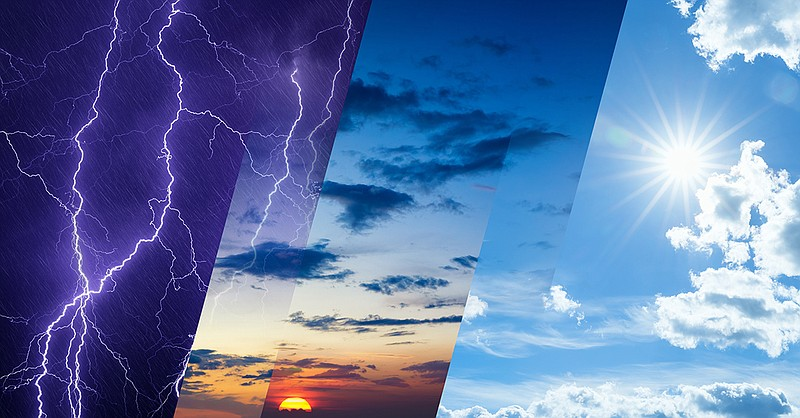

# Load The Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Data=pd.read_csv("/content/drive/MyDrive/london_weather.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [2]:
#lets see null data
Data.isnull().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

# handle missing data

In [3]:
#convert date to datetime
Data['date'] = pd.to_datetime(Data['date'], format='%Y%m%d')

# Set the date as the index
Data.set_index('date', inplace=True)

# Use time-based interpolation to fill missing values
#This method is specific to time series data. It considers the time intervals between observations when estimating missing values.
#It's like saying, "If I have data points at different times, the rate of change over time should influence my estimate of missing values."
Data.interpolate(method='time', inplace=True)

#I will return the date column because time-based interpolation requires that the date be the index
Data=Data.reset_index()

# Visualize Data

In [4]:
Data

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,0.0
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,0.0
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,0.0
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,0.0


In [5]:
Data.describe(datetime_is_numeric=True)

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,15341,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000,15341.000000
mean,2000-01-01 00:00:00,5.268855,4.350238,118.885438,15.390389,11.475605,7.559918,1.668320,101536.605502,0.034418
min,1979-01-01 00:00:00,0.000000,0.000000,8.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1989-07-02 00:00:00,4.000000,0.500000,41.000000,10.500000,7.100000,3.500000,0.000000,100920.000000,0.000000
50%,2000-01-01 00:00:00,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2010-07-02 00:00:00,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2020-12-31 00:00:00,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000
std,NaN,2.069463,4.028339,88.930233,6.555988,5.728699,5.326421,3.737984,1049.679871,0.519491


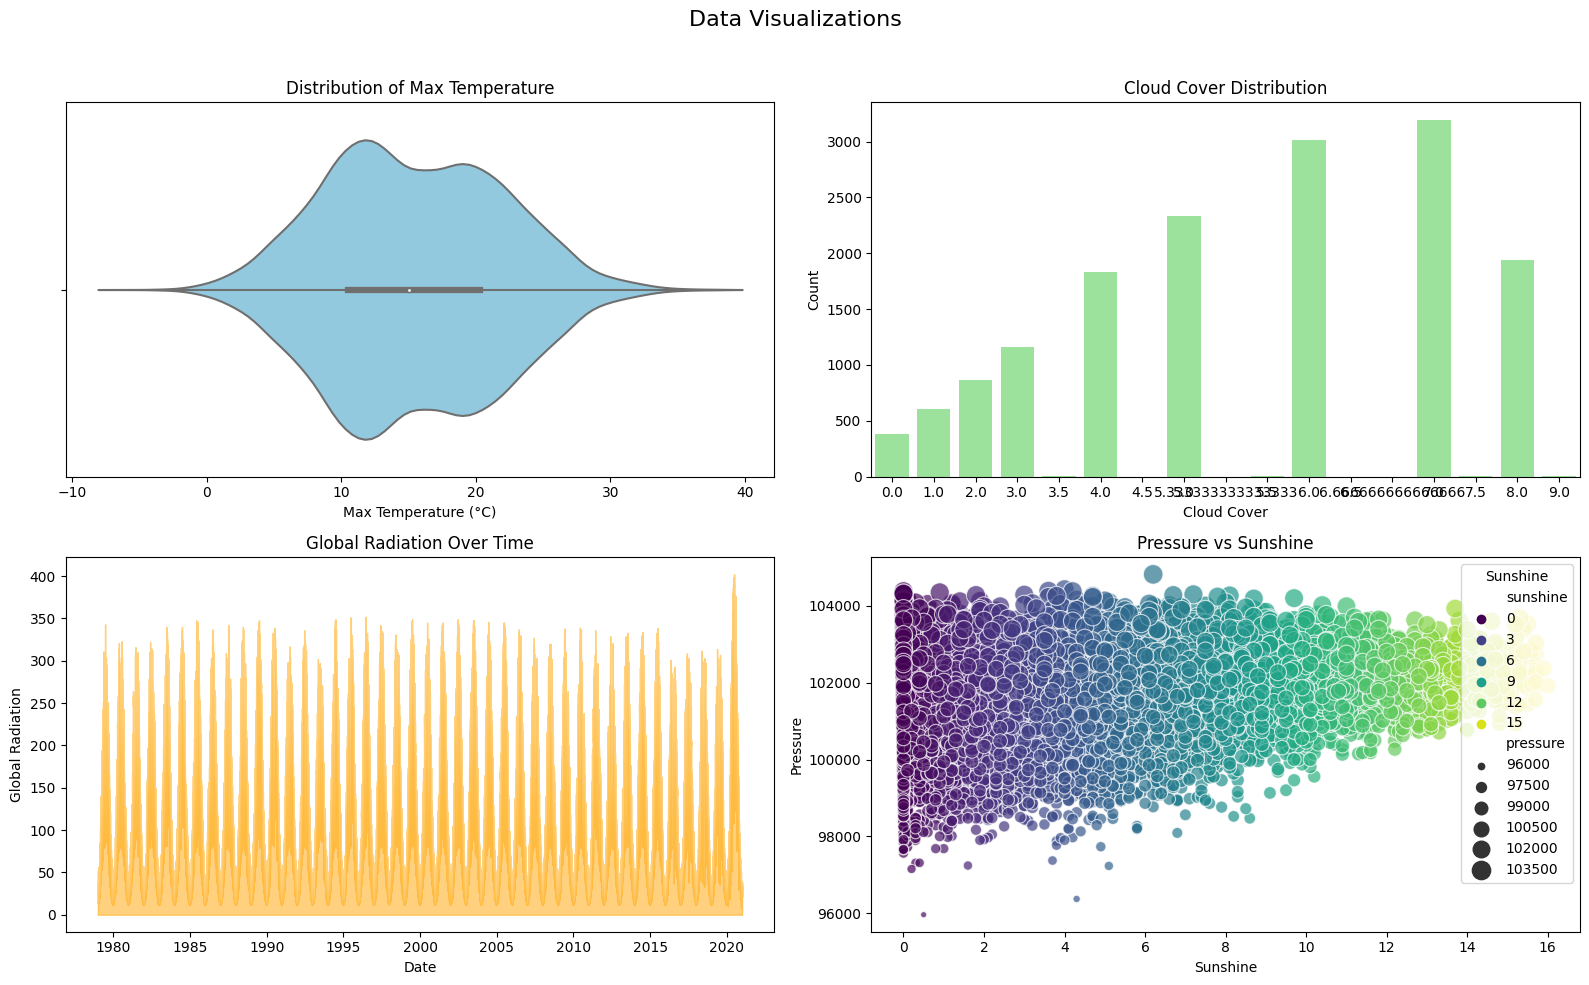

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Data Visualizations', fontsize=16)

# Visualization 1: Violin plot for Max Temperature
sns.violinplot(x=Data['max_temp'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Max Temperature')
axes[0, 0].set_xlabel('Max Temperature (°C)')

# Visualization 2: Bar chart for Cloud Cover
cloud_cover_counts = Data['cloud_cover'].value_counts().sort_index()
sns.barplot(x=cloud_cover_counts.index, y=cloud_cover_counts.values, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Cloud Cover Distribution')
axes[0, 1].set_xlabel('Cloud Cover')
axes[0, 1].set_ylabel('Count')

# Visualization 3: Area plot for Global Radiation over time
axes[1, 0].fill_between(Data['date'], Data['global_radiation'], color='orange', alpha=0.5)
axes[1, 0].set_title('Global Radiation Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Global Radiation')

# Visualization 4: Bubble plot for Pressure and Sunshine
sns.scatterplot(x=Data['sunshine'], y=Data['pressure'], size=Data['pressure'], sizes=(20, 200),
                hue=Data['sunshine'], ax=axes[1, 1], palette='viridis', alpha=0.7)
axes[1, 1].set_title('Pressure vs Sunshine')
axes[1, 1].set_xlabel('Sunshine')
axes[1, 1].set_ylabel('Pressure')
axes[1, 1].legend(title='Sunshine', loc='upper right')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

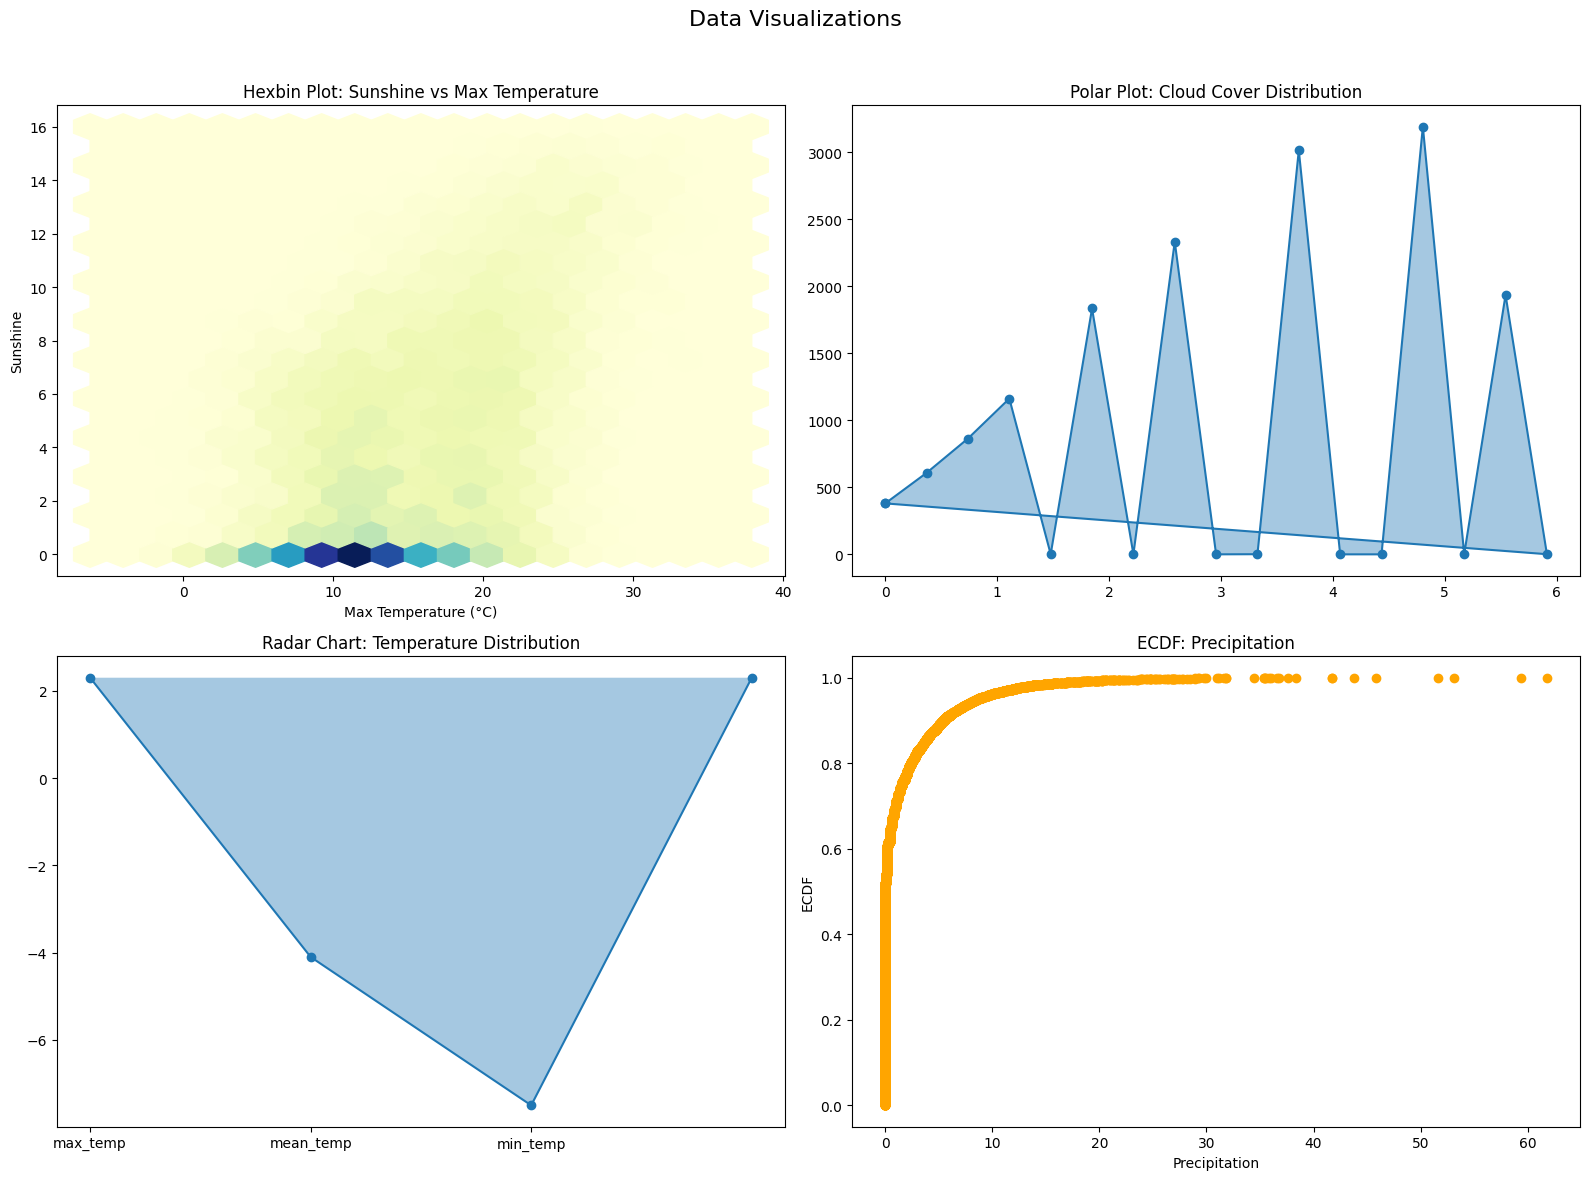

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Data Visualizations', fontsize=16)

# Visualization 1: Hexbin plot for Sunshine vs Max Temperature
axes[0, 0].hexbin(x=Data['max_temp'], y=Data['sunshine'], gridsize=20, cmap='YlGnBu')
axes[0, 0].set_title('Hexbin Plot: Sunshine vs Max Temperature')
axes[0, 0].set_xlabel('Max Temperature (°C)')
axes[0, 0].set_ylabel('Sunshine')


# Visualization 2: Polar plot for Cloud Cover distribution
cloud_cover_counts = Data['cloud_cover'].value_counts().sort_index()
theta = [i * 2 * np.pi / len(cloud_cover_counts) for i in range(len(cloud_cover_counts))]
axes[0, 1].plot(theta + [theta[0]], list(cloud_cover_counts) + [list(cloud_cover_counts)[0]], marker='o')
axes[0, 1].fill(theta + [theta[0]], list(cloud_cover_counts) + [list(cloud_cover_counts)[0]], alpha=0.4)
axes[0, 1].set_title('Polar Plot: Cloud Cover Distribution')

# Visualization 3: Radar chart for Temperature distribution
categories = Data.columns[4:7]  # Max, Mean, Min Temperature
values = Data.loc[0, categories].values.tolist() + [Data.loc[0, categories[0]]]  # Duplicate first value to close the circle
theta = np.linspace(0, 2 * np.pi, len(categories) + 1)

axes[1, 0].plot(theta, values, marker='o')
axes[1, 0].fill(theta, values, alpha=0.4)
axes[1, 0].set_title('Radar Chart: Temperature Distribution')
axes[1, 0].set_xticks(theta[:-1])
axes[1, 0].set_xticklabels(categories)

# Visualization 4: Boxplot with Swarmplot for Precipitation
sorted_data = np.sort(Data['precipitation'])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
axes[1, 1].plot(sorted_data, y, marker='o', linestyle='none', color='orange')
axes[1, 1].set_title('ECDF: Precipitation')
axes[1, 1].set_xlabel('Precipitation')
axes[1, 1].set_ylabel('ECDF')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


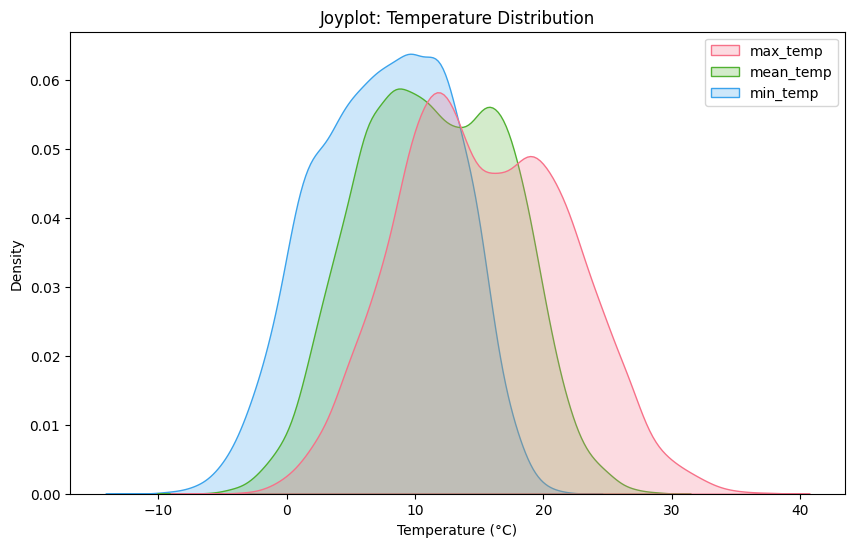

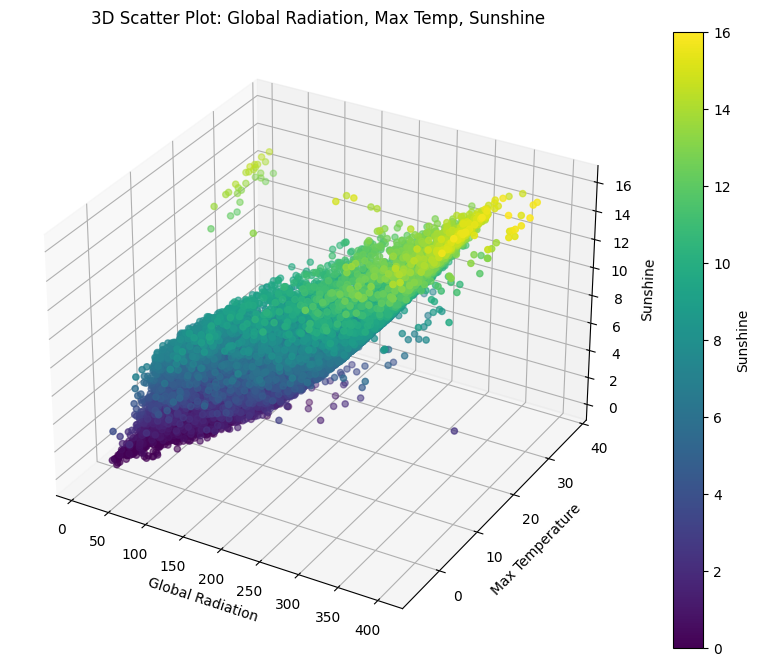

In [ ]:

# Visualization 2: Joyplot for Temperature Distribution
temperature_columns = ['max_temp', 'mean_temp', 'min_temp']
df_temperature = Data[temperature_columns]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_temperature, fill=True, common_norm=False, palette='husl')
plt.title('Joyplot: Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.show()

# Visualization 4: 3D Scatter Plot for Global Radiation, Max Temperature, and Sunshine
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(Data['global_radiation'], Data['max_temp'], Data['sunshine'], c=Data['sunshine'], cmap='viridis', s=20)
ax.set_title('3D Scatter Plot: Global Radiation, Max Temp, Sunshine')
ax.set_xlabel('Global Radiation')
ax.set_ylabel('Max Temperature')
ax.set_zlabel('Sunshine')

fig.colorbar(scatter, label='Sunshine')
plt.show()

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'cloud_cover'}>,
        <Axes: title={'center': 'sunshine'}>],
       [<Axes: title={'center': 'global_radiation'}>,
        <Axes: title={'center': 'max_temp'}>,
        <Axes: title={'center': 'mean_temp'}>],
       [<Axes: title={'center': 'min_temp'}>,
        <Axes: title={'center': 'precipitation'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'snow_depth'}>, <Axes: >, <Axes: >]],
      dtype=object)

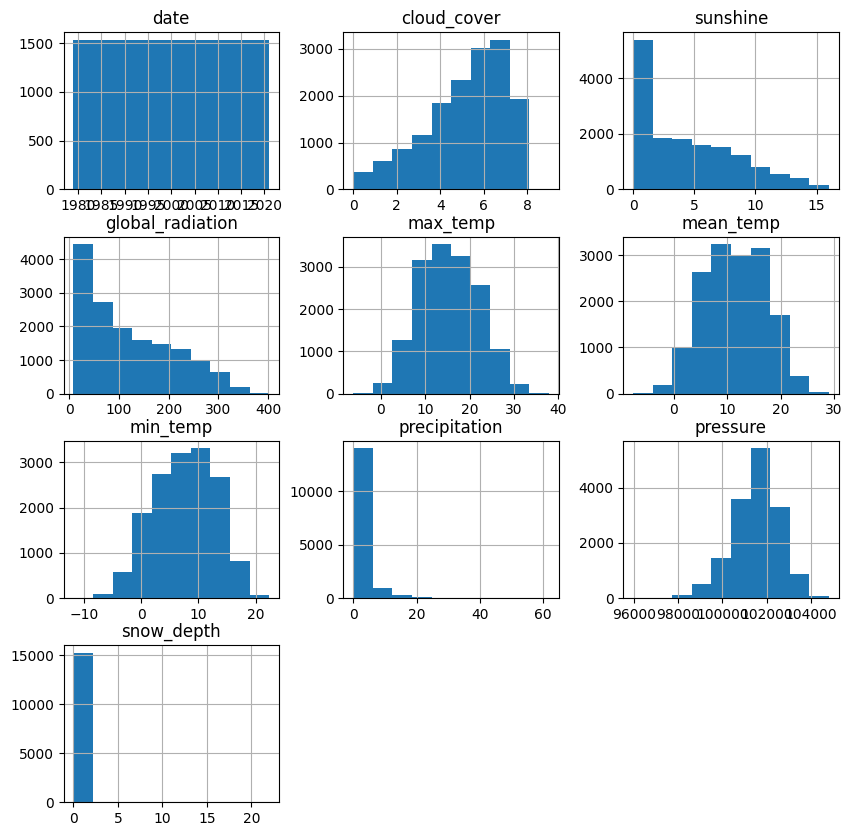

In [ ]:
Data.hist(figsize=(10,10))

<ipython-input-6-25e932cb9dc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Data.corr(),cmap="YlGnBu")


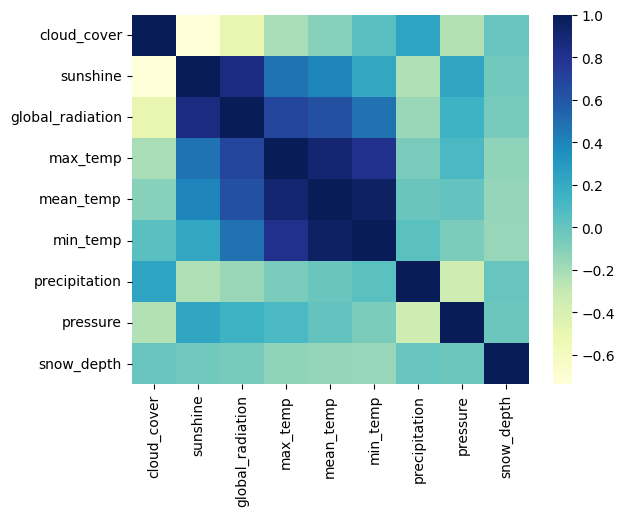

In [6]:
# see the correlations
sns.heatmap(Data.corr(),cmap="YlGnBu")
plt.show()

# modeling


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def preprocessing_pipeline(data):

    #extract day, month, and year

    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data = data.drop('date', axis=1)

    # Split data into features and label
    X = data.drop('mean_temp', axis=1)
    y = data['mean_temp']

    # Splitting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)



    pca = PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    return X_train, X_test, y_train, y_test



X_train, X_test, y_train, y_test = preprocessing_pipeline(Data)


In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
pred= linear_model.predict(X_test)
r2 = r2_score(y_test, pred)
r2

0.9742139479949188

# r2= 0.9742

# Let's predict temperature based only on time

In [214]:
df=pd.read_csv("/content/drive/MyDrive/london_weather.csv")[["date","mean_temp"]]

#convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Set the date as the index
df.set_index('date', inplace=True)

# Use time-based interpolation to fill missing values
#This method is specific to time series data. It considers the time intervals between observations when estimating missing values.
#It's like saying, "If I have data points at different times, the rate of change over time should influence my estimate of missing values."
df.interpolate(method='time', inplace=True)

mean_temp   -0.012247
dtype: float64

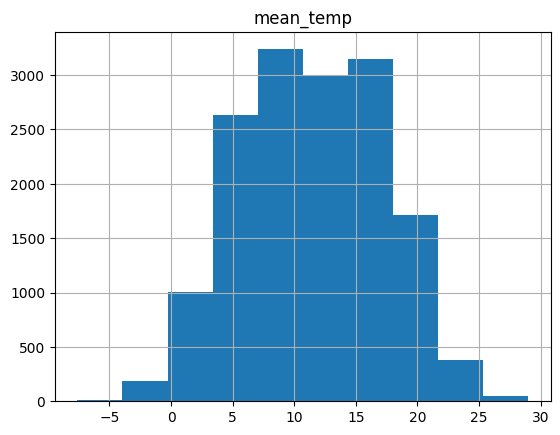

In [166]:
df.hist()
df.skew()

We have a normal distribution


<Axes: >

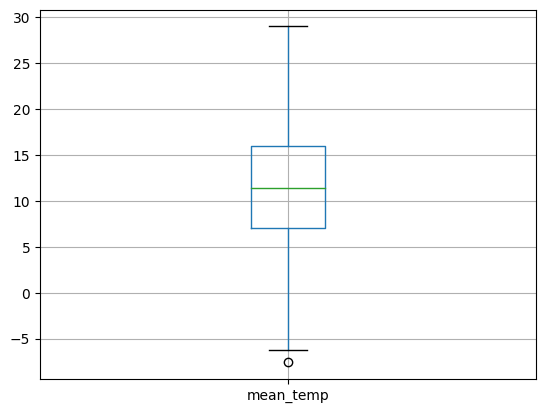

In [167]:
df.boxplot()

In [215]:
# Scaling data and eliminating outliers
df=(df- df.min()) / (df.max() - df.min())
df=np.tanh(df)**2

<Axes: >

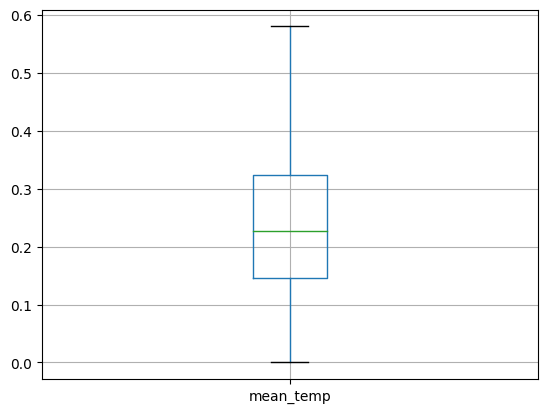

In [216]:
df.boxplot()

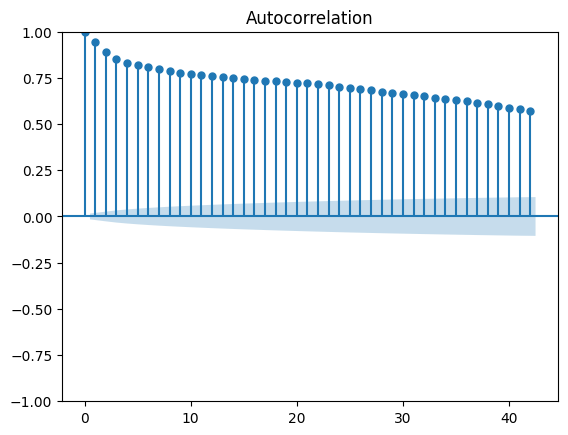

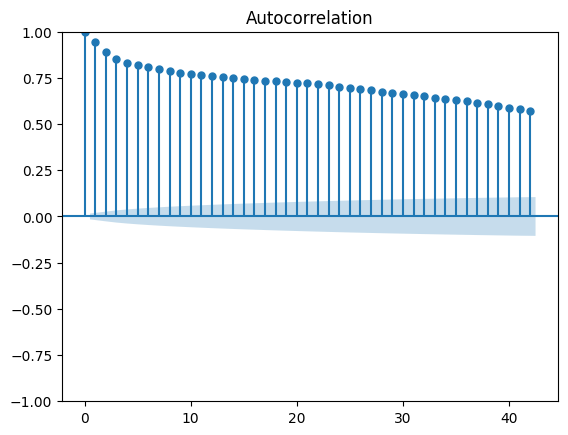

In [217]:
#Let's see how the data relates to itself
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

Nice, high correlation

In [219]:
#Let's make the data predict itself, where 60 previous values predict 61
step=60
X = []
y = []

for i in range(len(df) - step):
    # Extract the mean_temp values for the current window
    temp_sequence = df.values[i:i+step]

    # Append the sequence to X
    X.append(temp_sequence)

    # Append the next mean_temp value to y
    y.append(df.values[i+step])

# Convert lists to numpy arrays
X = np.array(X).reshape(-1, step, 1)
y = np.array(y)

In [221]:
#split the data in chronological order
Xtrain=X[:13000]
ytrain=y[:13000]

Xval=X[13000:14000]
yval=y[13000:14000]

Xtest=X[14000:]
ytest=y[14000:]

# modeling

In [223]:
from tensorflow.keras.layers  import BatchNormalization,LayerNormalization,LSTM,Dense,GaussianDropout
from tensorflow.keras import Sequential
import tensorflow as tf

model=Sequential([
    LSTM(100,return_sequences=True,input_shape=(60,1)),
    LayerNormalization(),
    GaussianDropout(0.2),

    LSTM(100),
    LayerNormalization(),
    GaussianDropout(0.2),

    Dense(100,activation="relu"),
    BatchNormalization(),
    GaussianDropout(0.2),

    Dense(1)

])
model.compile(optimizer="adam",loss="mse",metrics=["mae"])

In [228]:
call=tf.keras.callbacks.ModelCheckpoint(
    "wights5.h5",
    monitor= 'val_mae',
    verbose=1,
    save_best_only= True,
    save_weights_only= False,
    mode = 'min',
)
hist=model.fit(Xtrain,ytrain,epochs=50,validation_data=(Xval,yval),callbacks=[call],workers=1,
    use_multiprocessing=False)

Epoch 1/50
403/407 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0341
Epoch 1: val_mae improved from inf to 0.02987, saving model to wights5.h5
407/407 [==============================] - 10s 24ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0014 - val_mae: 0.0299
Epoch 2/50
 10/407 [..............................] - ETA: 4s - loss: 0.0016 - mae: 0.0324

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


407/407 [==============================] - ETA: 0s - loss: 0.0018 - mae: 0.0340
Epoch 2: val_mae did not improve from 0.02987
407/407 [==============================] - 4s 11ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0015 - val_mae: 0.0306
Epoch 3/50
405/407 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0340
Epoch 3: val_mae did not improve from 0.02987
407/407 [==============================] - 4s 11ms/step - loss: 0.0018 - mae: 0.0340 - val_loss: 0.0014 - val_mae: 0.0301
Epoch 4/50
406/407 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0341
Epoch 4: val_mae improved from 0.02987 to 0.02934, saving model to wights5.h5
407/407 [==============================] - 6s 15ms/step - loss: 0.0018 - mae: 0.0341 - val_loss: 0.0014 - val_mae: 0.0293
Epoch 5/50
407/407 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0345
Epoch 5: val_mae improved from 0.02934 to 0.02909, saving model to wights5.h5
407/407 [========================

41/41 [==============================] - 0s 7ms/step


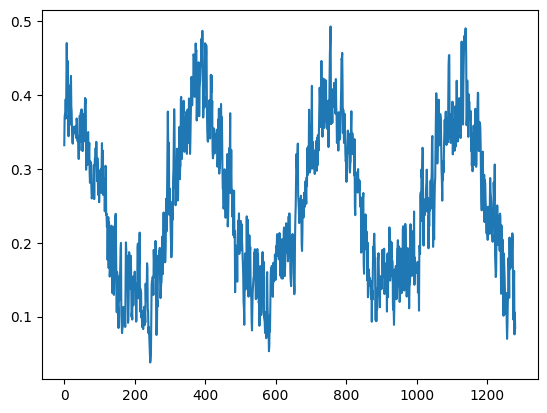

In [229]:
plt.plot(model.predict(Xtest))
plt.show()

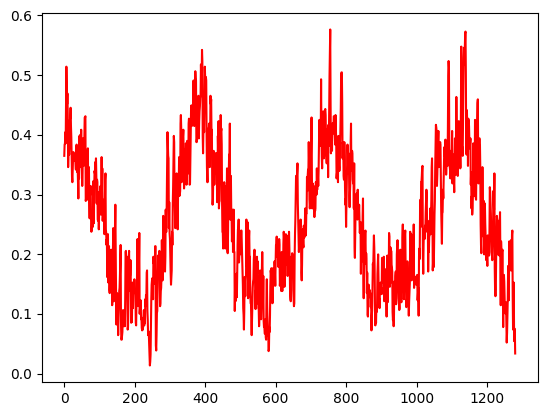

In [231]:
plt.plot(ytest,color="r")
plt.show()

41/41 [==============================] - 0s 9ms/step


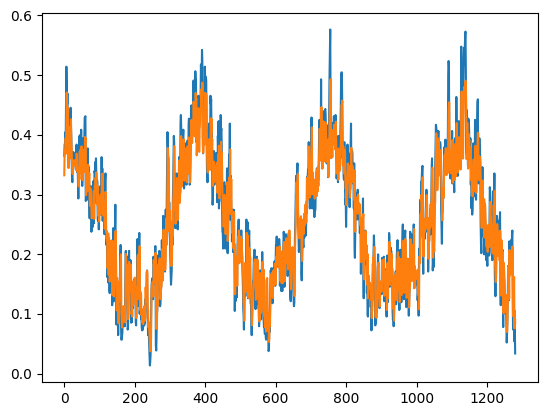

In [233]:
plt.plot(ytest)
plt.plot(model.predict(Xtest))
plt.show()